#**ANALYSIS AND PREDICTION THE VALUE OF GDP PERCAPITA IN EACH COUNTRY**


# **Business Understanding**

Gross domestic product (GDP) is a standardized measure of the value added created through the production of goods and services produced within a country's borders in a given period of time. As a broad measure of overall domestic production, it serves as a comprehensive scorecard of a country's economic health. In this Final Project, we will investigate the "Countries of the World" dataset by Fernando Lasso that we got from Kaggle. We will focus on the factors that affect a country's GDP per capita and try to build a model using the data of 227 countries from the dataset. We will also briefly discuss total GDP.

# **Analytic Approach**

The analysis approach in this study used the Linear Regression algorithm. The Linear Regression algorithm is a way of measuring prediction data through a straight line as a description of the correlation relationship between 2 or more variables. Linear regression prediction is used as a technique to study how variables relate to the data forecasting process.  Linear regression analysis is based on six fundamental assumptions. The dependent and independent variables show a linear relationship between the slope and intercept. The independent variables are not random. The residual (error) value is zero. The residual (error) value is constant across all observations. Residual values (errors) are uncorrelated across all observations. Residual (error) values follow a normal distribution.

# **Data Collection**

The first step I did was to import the data that I had uploaded on github by including the github link and also importing some tools that I would need to create an analysis model.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/rizalagusa/tugas-akhir-pds/master/countries%20of%20the%20world.csv", decimal=',')

In [ ]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


# **Data Requirements**

To achieve the goals in business understanding, there is some data needed. These data are:

In [ ]:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

#**Data Understanding**

View data dimensions :

In [ ]:
# Checking to find out the number of data and columns in the dataset
data.shape

(227, 20)

From the output above, it can be understood that there are 227 data available, divided into 20 columns, where each column is a different type of information.
divided into 20 columns where each column is a different type of information.

View the description of each column in the dataframe :

In [ ]:
data.describe(include='all')

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ukraine,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


From the output above there are still some empty values. Therefore, we will
we process them at the next stage.

#**Data Preperation**

It can be noticed that there are some missing data or 'null' values in the table. For simplicity, we will fill in the missing data by using the median region where a country is located, as geologically close countries are often similar in many ways.

In [ ]:
data.groupby('Region')[['GDP ($ per capita)','Literacy (%)', 'Agriculture']].mean()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),8053.571429,79.553571,0.177643
BALTICS,11300.000000,99.733333,0.045000
C.W. OF IND. STATES,4000.000000,98.725000,0.192000
EASTERN EUROPE,9808.333333,97.088889,0.092167
LATIN AMER. & CARIB,8682.222222,90.654545,0.091023
NEAR EAST,10456.250000,79.521429,0.063812
NORTHERN AFRICA,5460.000000,67.240000,0.135000
NORTHERN AMERICA,26100.000000,97.750000,0.014000
OCEANIA,8247.619048,88.835294,0.175125


In [ ]:
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = data.groupby('Region')[col].median()
    for region in data['Region'].unique():
        data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
print(data.isnull().sum())

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


As can be seen, there is no longer any data that has no value or has a null value. Next, we will display the data in a heatmap to see the correlation of each variable.

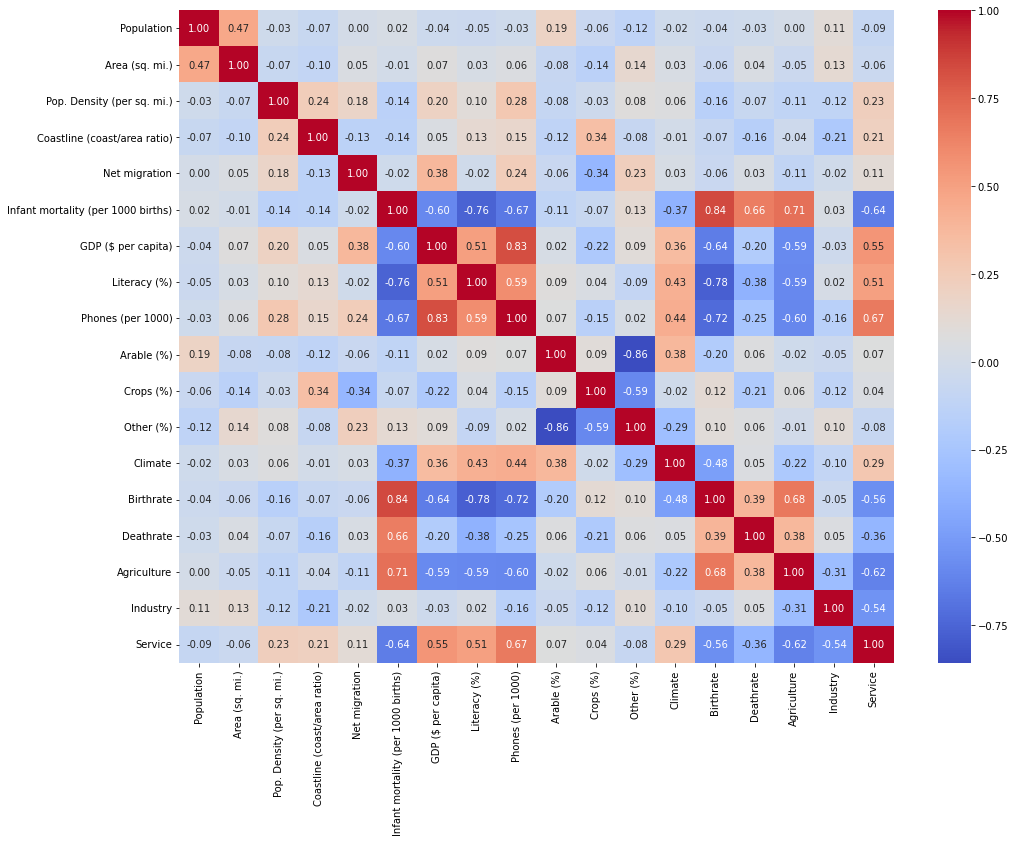

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

Then we will look at the 20 countries with the largest GDP.

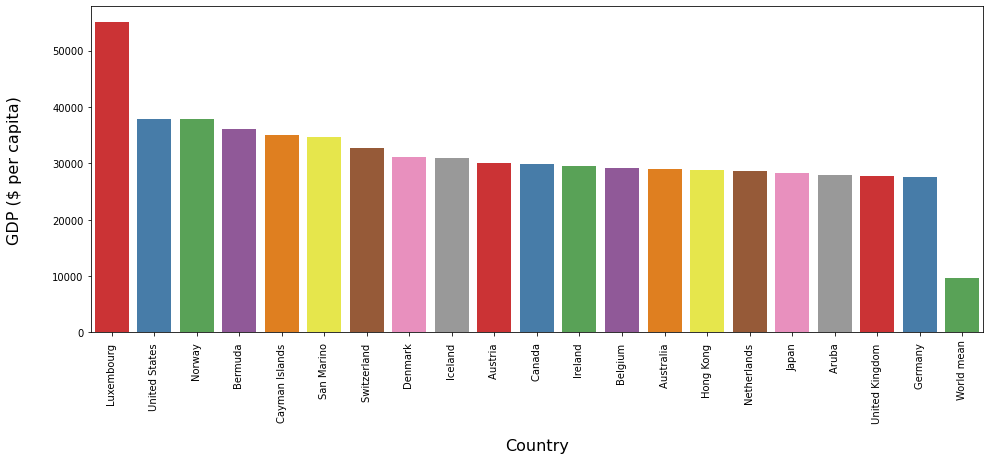

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
top_gdp_countries = data.sort_values('GDP ($ per capita)',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[data['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)
sns.barplot(x='Country', y='GDP ($ per capita)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


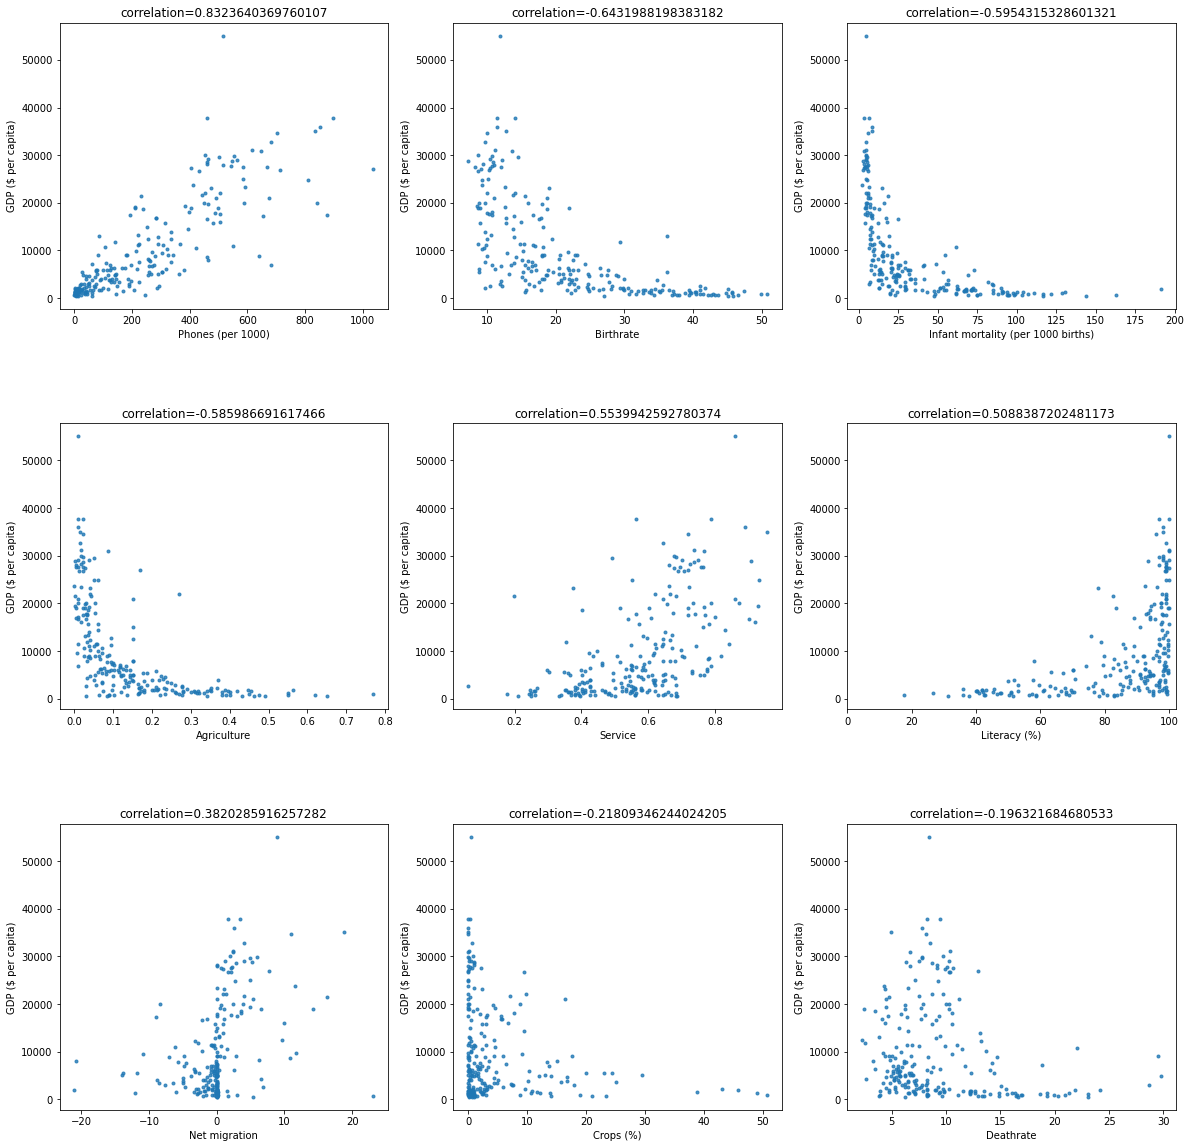

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = data['GDP ($ per capita)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

**Countries with low birth rates and low GDP per capita**

Some features, such as mobile phones, are related to average GDP more linearly, while others are not. For example, high birth rates usually mean low GDP per capita, but average GDP in countries with low birth rates can vary widely.

In [ ]:
data.loc[(data['Birthrate']<14) & (data['GDP ($ per capita)'] < 10000)]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418
18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.0,11.16,14.02,0.093,0.316,0.591
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,98.6,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,98.6,336.3,40.02,1.92,58.06,3.0,9.65,14.27,0.093,0.304,0.603
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
51,Cuba,LATIN AMER. & CARIB,11382820,110860,102.7,3.37,-1.58,6.33,2900.0,97.0,74.7,33.05,7.60,59.35,2.0,11.89,7.22,0.055,0.261,0.684
75,Georgia,C.W. OF IND. STATES,4661473,69700,66.9,0.44,-4.70,18.59,2500.0,99.0,146.6,11.44,3.86,84.70,3.0,10.41,9.23,0.172,0.275,0.553
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,98.6,260.0,22.26,1.81,75.93,3.0,12.02,8.77,0.118,0.319,0.563
168,Romania,EASTERN EUROPE,22303552,237500,93.9,0.09,-0.13,26.43,7000.0,98.4,196.9,40.82,2.25,56.93,3.0,10.70,11.77,0.101,0.350,0.549
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,4.0,9.95,14.65,0.054,0.371,0.575


#**Data Modeling**

**Training and Testing**

Start modeling the data by dividing into 2 variables X and Y. Where the X variable contains the factors used to predict the price value and the Y variable contains the value to be predicted, namely GDP.

We will first divide the data into training data and testing data and standardize or normalize with scaling.

In [ ]:
LE = LabelEncoder()
data['Regional_label'] = LE.fit_transform(data['Region'])
data['Climate_label'] = LE.fit_transform(data['Climate'])
data.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Regional_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,3,4
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,6,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,8,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,10,4
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,2.0,45.11,24.20,0.0960,0.658,0.246,9,2
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.0400,0.180,0.780,4,2
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.0380,0.220,0.743,4,2
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.0950,0.358,0.547,4,4
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.2390,0.343,0.418,2,5


In [ ]:
train, test = train_test_split(data, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service','Regional_label',
       'Climate_label','Service']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [ ]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 4942.743318786314 msle_train: 4.8784583338478
rmse_test: 4418.252101395197 msle_test: 6.400983631660587


#**Model Evaluation**

After the model is successfully created, we can then predict of each country's GDP.

In [ ]:
y_pred = model.predict(test_X)
y_pred_df = pd.DataFrame(y_pred, columns=["GDP(Predicted)" ])
y_test_df = pd.DataFrame(np.array(test_Y), columns=["GDP(Current)"])
pd.concat([y_test_df , y_pred_df] , axis=1)

,GDP(Current),GDP(Predicted)
0,2700.0,6272.988038
1,16700.0,13353.769301
2,23700.0,18663.639262
3,17700.0,21755.947805
4,5500.0,5860.815233
...,...,...
64,20000.0,29643.330876
65,21600.0,20016.843208
66,9100.0,12505.662803
67,9600.0,14842.406398


After that we can calculate the level of accuracy of the model that has been made.

In [ ]:
y_pred = model.predict(test_X)
print(f"Accuracy of training set:", model.score(train_X, train_Y))
print(f"Accuracy of testing set: ", model.score(test_X, test_Y))

Accuracy of training set: 0.7587482591620576
Accuracy of testing set:  0.7675763251361413


From the output above, it can be seen that the training set accuracy is 76% and the testing set accuracy is 75%. However, it can be understood that the predicted value is only a calculated value that is processed based on existing data. The results in the real world are sometimes different due to the 'x' factor that occurs beyond the understanding of the data used such as the economic policies of a country that appear unexpectedly.